拟合曲线为：y = 3.985 x + 2.987


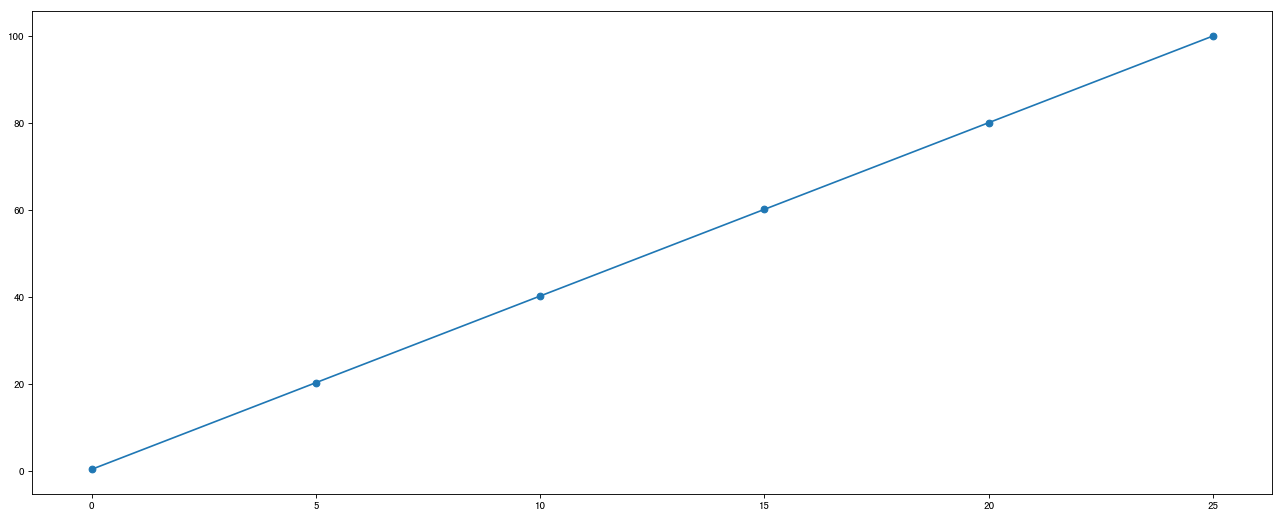

In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
x = tf.constant([[0],[0.5],[1],[1.5],[2],[2.5]])
y_true = tf.constant([[0.0031],[0.2023],[0.4014],[0.6006],[0.8000],[0.9995]])
x_1 = []
y_p1 = []
y_t1 = []
#模型定义
weight = tf.Variable(tf.random_normal(shape = [1,1]))
bias = tf.Variable(tf.random_normal(shape = [1,1]))
y_predict = tf.matmul(x,weight) + bias
# 最小二乘
error = tf.reduce_mean(tf.square(y_predict-y_true))
# 迭代器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(error)
# 初始化变量
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(optimizer)
    print("拟合曲线为：y = %.3f x + %.3f"%(weight.eval()*10,bias.eval()*1000))
    x_1 = x.eval()
    y_p1 = y_predict.eval()
    y_t1 = y_true.eval()
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x_1*10,y_p1*100)
plt.scatter(x_1*10,y_t1*100)
plt.show()